# Question
Does the number of emergency calls increase during a planetary alignment?
Mercury in retrograde has a reputation for bringing chaos and confusion. It occurs when an optical illusion makes the the planet appear to be moving in the opposite direction that it usually does. In New Age Spiritualism it is supposedly responsible for increased stressm anger, resentment, or sadness. 

## Hypothesis
During periods of Mercury retrograde, there will be a statistically significant increase in the number of 911 dispatches compared to non-retrograde periods.

This hypothesis is grounded in the following observations:

-   Mercury retrograde is associated with communication issues and misunderstandings [1](https://www.jessicaadams.com/2017/12/10/blog/mercury-retrograde-what-does-it-mean/)  [4](https://timesofindia.indiatimes.com/astrology/planets-transits/understanding-mercury-retrograde-and-how-it-affects-us/articleshow/109243613.cms).

-   It often coincides with technological malfunctions and disruptions [3](https://nowandgen.com/2018/07/31/mercury-retrograde-susan-millers-tips-on-how-to-deal/).

-   There's an increased likelihood of accidents and mishaps during this period [3](https://nowandgen.com/2018/07/31/mercury-retrograde-susan-millers-tips-on-how-to-deal/)  [4](https://timesofindia.indiatimes.com/astrology/planets-transits/understanding-mercury-retrograde-and-how-it-affects-us/articleshow/109243613.cms).

### Import Data and Dependencies

In [92]:
import pandas as pd
import databuilder
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

db = databuilder

In [111]:
# Load the emergency dataset into Pandas dataframe and display first five rows
emergency_df = db.get_emergency_data()
display(emergency_df.head())

# Load the mercury dataset into Pandas dataframe and display first five rows
mercury_df = db.get_mercury_data()
display(mercury_df.head())

emergency_df.to_csv("emergency.csv", index=False)

,INCIDENT,REPORTED,CLOSED,CATEGORY,REPORTED_DATE
0,19000004,2019-01-01 00:03:00,2019-01-01 01:22:00,ALS,2019-01-01
1,19000006,2019-01-01 00:05:00,2019-01-01 00:29:00,ALS,2019-01-01
2,19000008,2019-01-01 00:07:00,2019-01-01 00:20:00,ALS,2019-01-01
3,19000011,2019-01-01 00:10:00,2019-01-01 00:23:00,BLS,2019-01-01
4,19000013,2019-01-01 00:10:00,2019-01-01 00:36:00,ALS,2019-01-01


,year,start_date,end_date
0,2019,2019-03-05,2019-03-28
1,2019,2019-07-07,2019-08-01
2,2019,2019-10-31,2019-11-20
3,2020,2020-02-16,2020-03-09
4,2020,2020-06-17,2020-07-11


# Analysis
## emergency_df | General

In [94]:
emergency_df['REPORTED_DATE'] = emergency_df['REPORTED'].dt.date
emergency_df_grouped = emergency_df.groupby('REPORTED_DATE').size().reset_index(name='COUNT') 

# Convert REPORTED_DATE back to datetime for easier plotting
emergency_df_grouped['REPORTED_DATE'] = pd.to_datetime(emergency_df_grouped['REPORTED_DATE'])

print(len(emergency_df_grouped))
display(emergency_df_grouped.head())

1826


,REPORTED_DATE,COUNT
0,2019-01-01,555
1,2019-01-02,621
2,2019-01-03,566
3,2019-01-04,613
4,2019-01-05,538


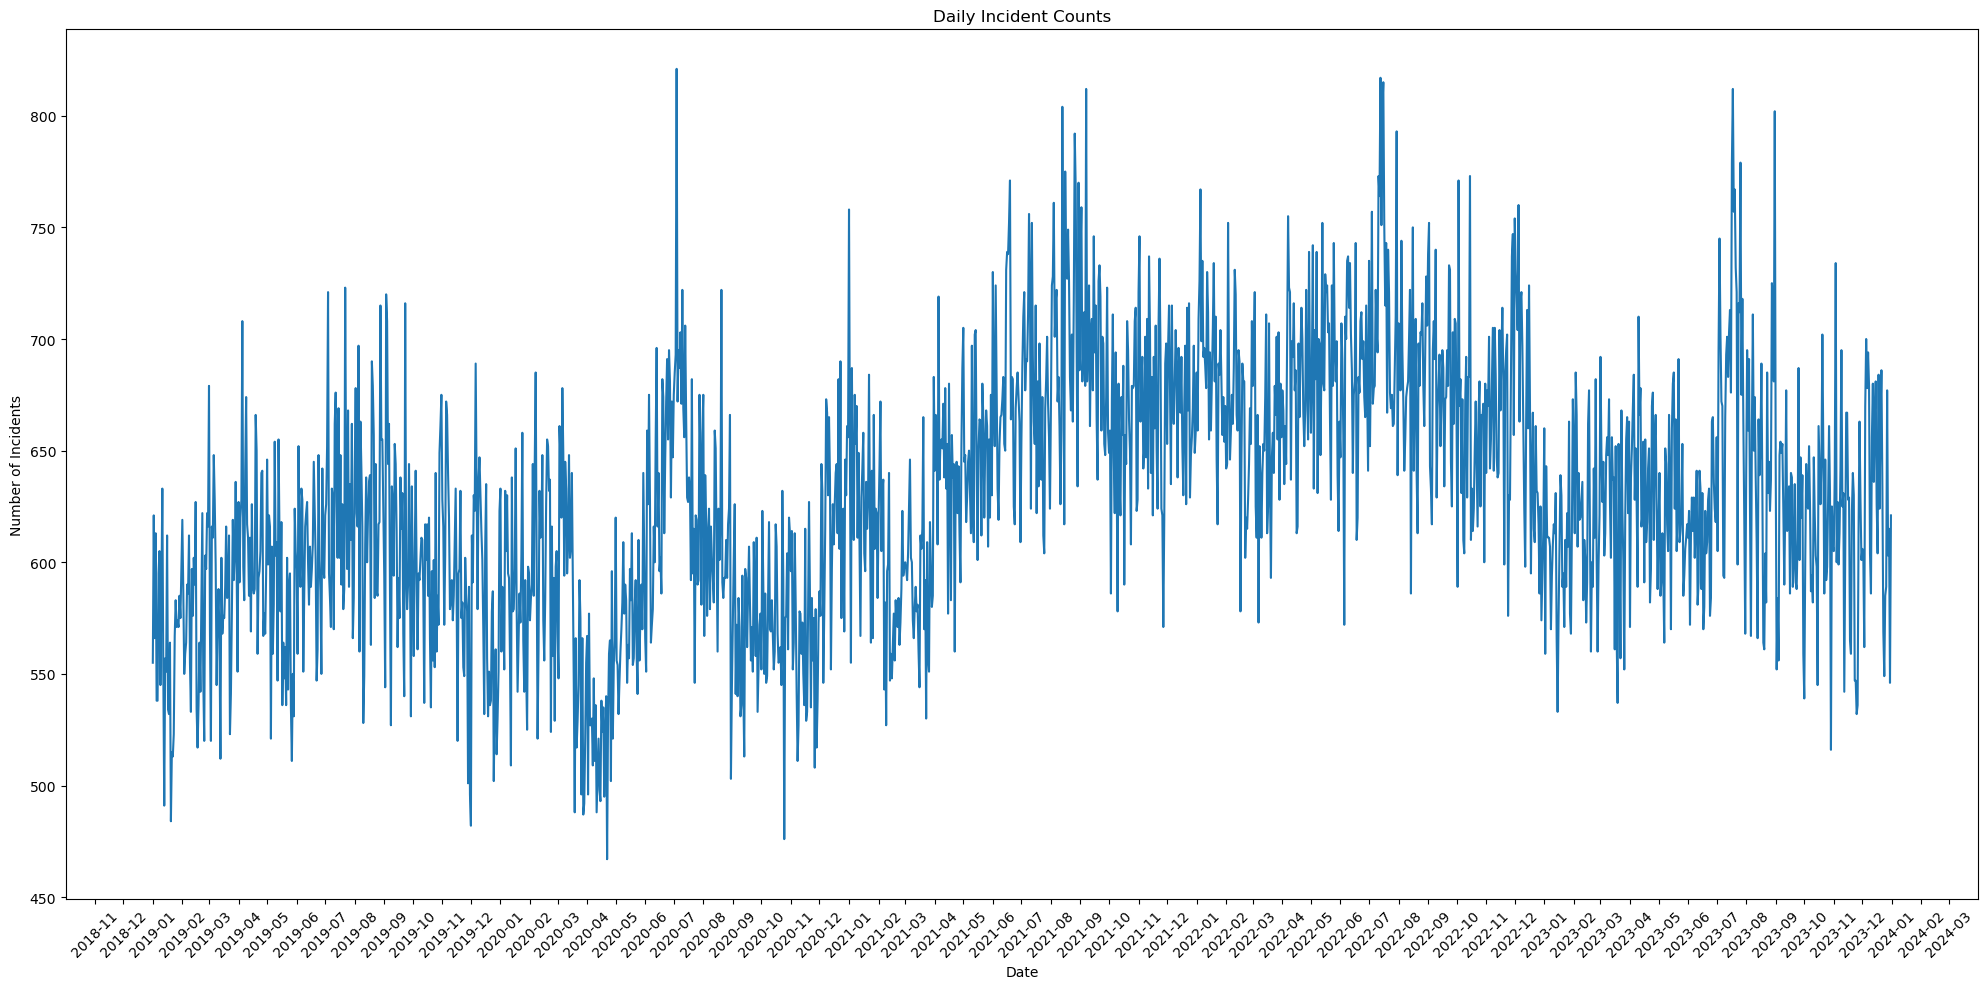

In [95]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the incident counts
ax.plot(emergency_df_grouped['REPORTED_DATE'], emergency_df_grouped['COUNT'])

# Customize the plot
plt.title('Daily Incident Counts 2019-2023')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')

# Improve x-axis date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## mercury_df | General

In [110]:
print(len(mercury_df))
print(mercury_df.columns)
print(mercury_df.dtypes)
display(mercury_df.head())

16
Index(['year', 'start_date', 'end_date'], dtype='object')
year                   int64
start_date    datetime64[ns]
end_date      datetime64[ns]
dtype: object


,year,start_date,end_date
0,2019,2019-03-05,2019-03-28
1,2019,2019-07-07,2019-08-01
2,2019,2019-10-31,2019-11-20
3,2020,2020-02-16,2020-03-09
4,2020,2020-06-17,2020-07-11


In [97]:
#checks if a given date falls within any of the specified date ranges
def is_in_range(date, ranges):
    return any((start <= date <= end for start, end in ranges))

In [98]:
#creates a list of tuples, where each tuple contains a start date and end date, representing the date ranges for Mercury retrograde periods.
date_ranges = list(zip(mercury_df['start_date'], mercury_df['end_date']))
print(len(date_ranges))

16


## Mercury Retrograde | General Analysis

In [99]:
emergency_df_grouped['in_range'] = emergency_df_grouped['REPORTED_DATE'].apply(lambda x: is_in_range(x, date_ranges))

In [100]:
# Calculate average COUNT for dates within ranges and outside ranges
avg_in_range = emergency_df_grouped[emergency_df_grouped['in_range']]['COUNT'].mean()
avg_out_range = emergency_df_grouped[~emergency_df_grouped['in_range']]['COUNT'].mean()

print(f"Average COUNT within date ranges: {avg_in_range}")
print(f"Average COUNT outside date ranges: {avg_out_range}")
#print percentage difference
print(f"Percentage Difference: {((avg_in_range - avg_out_range) / avg_out_range) * 100:.2f}%")

# Group by month and calculate average COUNT
emergency_df_grouped['month'] = emergency_df_grouped['REPORTED_DATE'].dt.to_period('M')
monthly_avg = emergency_df_grouped.groupby('month')['COUNT'].mean()

print("\nMonthly averages:")
print(monthly_avg)


Average COUNT within date ranges: 634.679347826087
Average COUNT outside date ranges: 628.7853223593964
Percentage Difference: 0.94%

Monthly averages:
month
2019-01    562.741935
2019-02    576.785714
2019-03    587.258065
2019-04    610.300000
2019-05    582.548387
2019-06    601.300000
2019-07    623.838710
2019-08    626.709677
2019-09    612.133333
2019-10    595.806452
2019-11    590.433333
2019-12    580.935484
2020-01    585.645161
2020-02    601.137931
2020-03    581.064516
2020-04    528.233333
2020-05    576.419355
2020-06    632.800000
2020-07    653.451613
2020-08    607.806452
2020-09    570.800000
2020-10    576.032258
2020-11    563.500000
2020-12    623.161290
2021-01    629.129032
2021-02    589.071429
2021-03    593.806452
2021-04    640.800000
2021-05    647.935484
2021-06    677.733333
2021-07    676.032258
2021-08    708.000000
2021-09    699.233333
2021-10    656.161290
2021-11    672.166667
2021-12    672.677419
2022-01    689.451613
2022-02    665.107143
2022-0

### Mercury Retrograde | Overview

Result: Correlation between incident count and retrograde periods: 0.0411

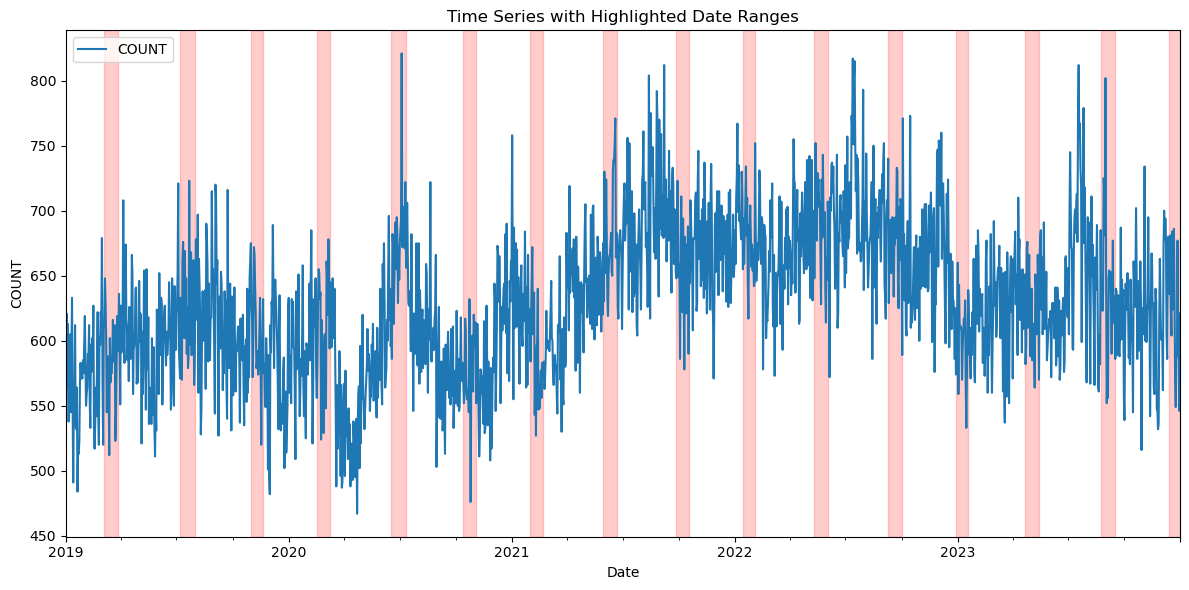

In [101]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the entire time series
emergency_df_grouped.plot(x='REPORTED_DATE', y='COUNT', ax=ax, label='COUNT')

# Highlight the date ranges
for start, end in date_ranges:
    ax.axvspan(start, end, alpha=0.2, color='red')

# Customize the plot
plt.title('Time Series with Highlighted Date Ranges')
plt.xlabel('Date')
plt.ylabel('COUNT')
plt.legend()
plt.tight_layout()
plt.show()


### Mercury Retrograde | Correlation

In [113]:
# Load the Mercury retrograde data
mercury_df['start_date'] = pd.to_datetime(mercury_df['start_date'])
mercury_df['end_date'] = pd.to_datetime(mercury_df['end_date'])

# Load the emergency incidents data
emergency_df['REPORTED'] = pd.to_datetime(emergency_df['REPORTED'])

# Function to check if a date is within Mercury retrograde
def is_retrograde(date):
    return any((start <= date <= end for start, end in zip(mercury_df['start_date'], mercury_df['end_date'])))

# Group the emergency data by date and count incidents
daily_incidents = emergency_df.groupby(emergency_df['REPORTED'].dt.date).size().reset_index(name='incident_count')
daily_incidents['REPORTED'] = pd.to_datetime(daily_incidents['REPORTED'])
daily_incidents['is_retrograde'] = daily_incidents['REPORTED'].apply(is_retrograde)

# Create a binary column for retrograde periods
daily_incidents['retrograde'] = daily_incidents['is_retrograde'].astype(int)

# Calculate the correlation
correlation = daily_incidents[['incident_count', 'retrograde']].corr()


print(f"Correlation between incident count and retrograde periods: {correlation.iloc[0, 1]:.4f}")


Correlation between incident count and retrograde periods: 0.0411


### Mercury Retrograde | Monthly Averages

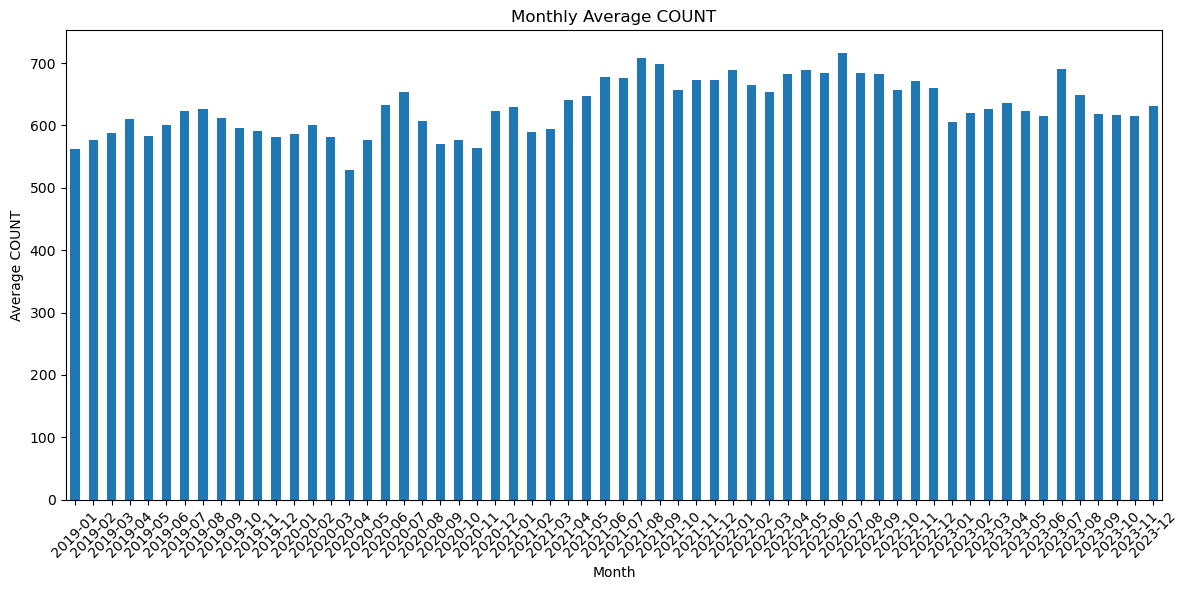

In [102]:
# Plot monthly averages
monthly_avg.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Average COUNT')
plt.xlabel('Month')
plt.ylabel('Average COUNT')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Mercury Retrograde | In vs Out of Range

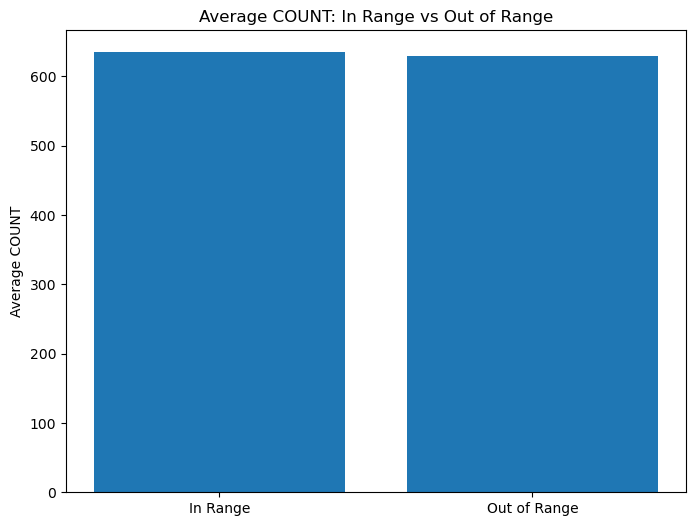

In [103]:
labels = ['In Range', 'Out of Range']
averages = [avg_in_range, avg_out_range]

plt.figure(figsize=(8, 6))
plt.bar(labels, averages)
plt.title('Average COUNT: In Range vs Out of Range')
plt.ylabel('Average COUNT')
plt.show()


## Mercury Retrograde | By Category
Needs work

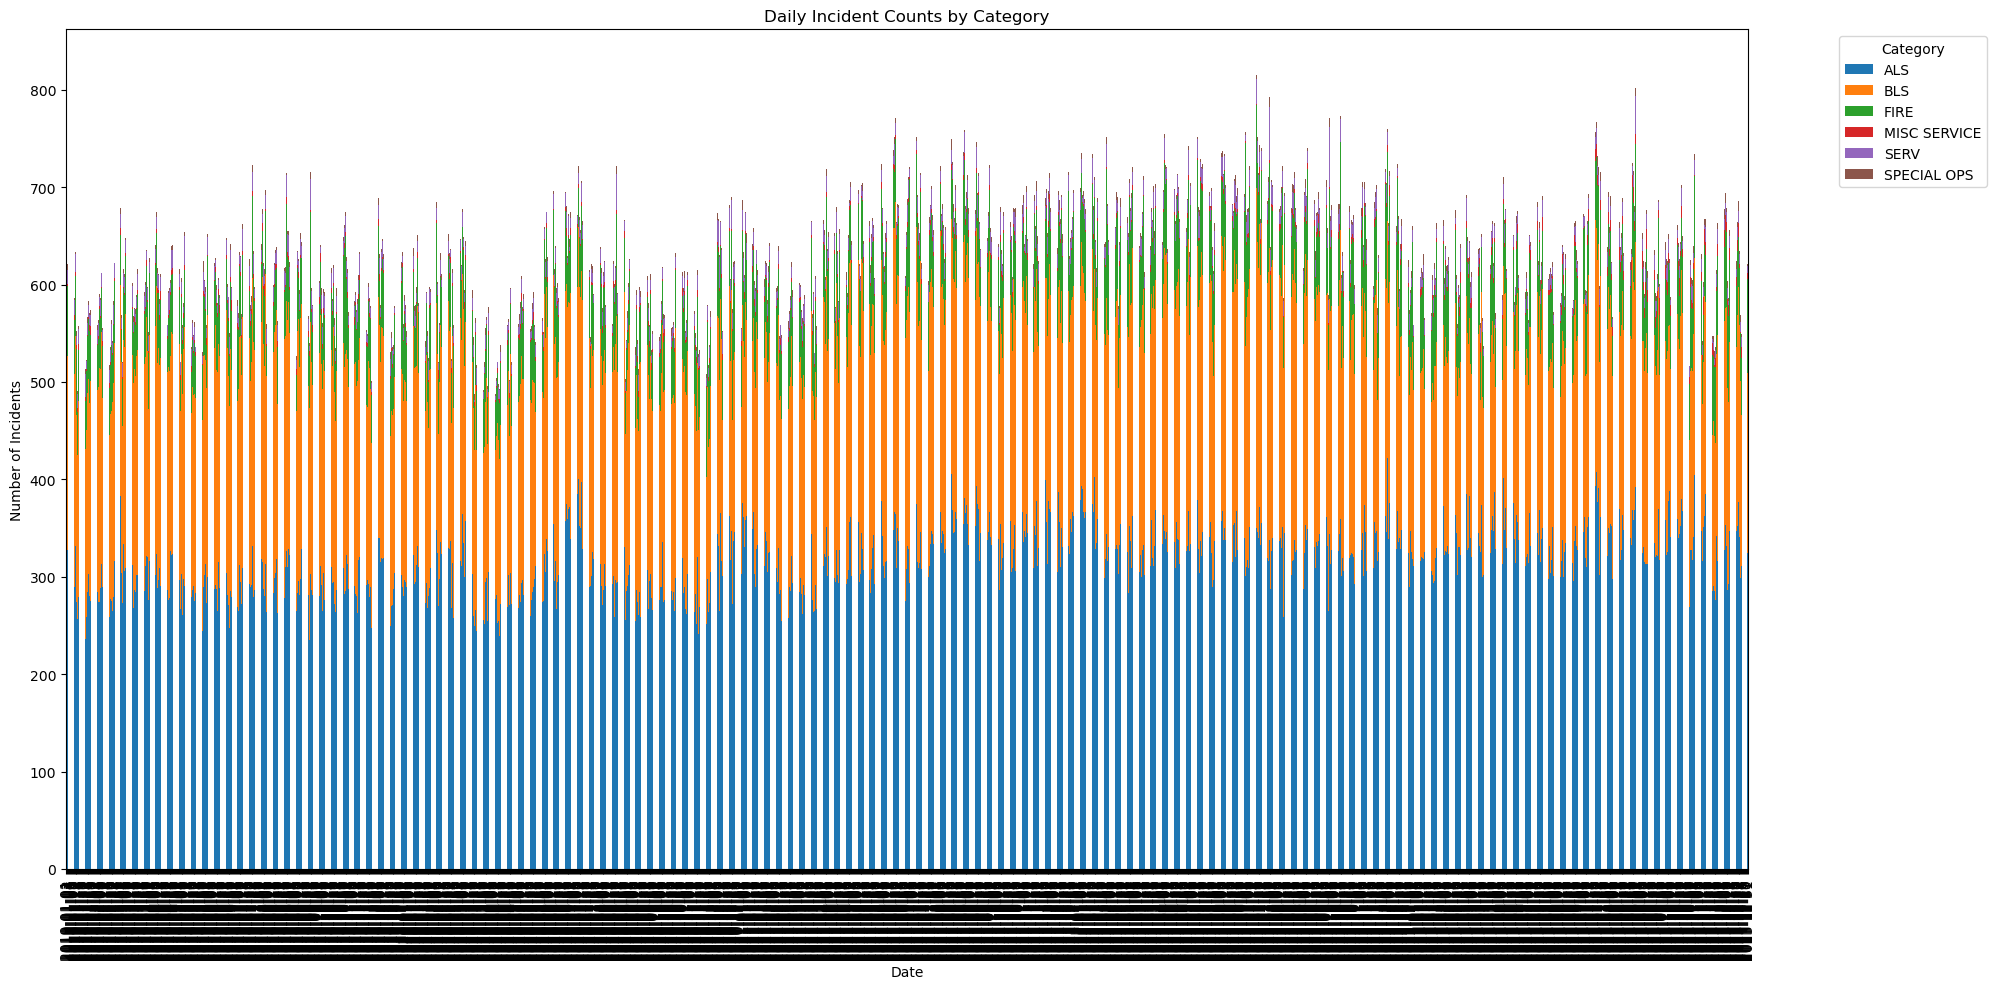

In [104]:
category_counts = emergency_df.groupby(['REPORTED_DATE', 'CATEGORY']).size().unstack(fill_value=0)

# Plot stacked bar chart
category_counts.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Daily Incident Counts by Category')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

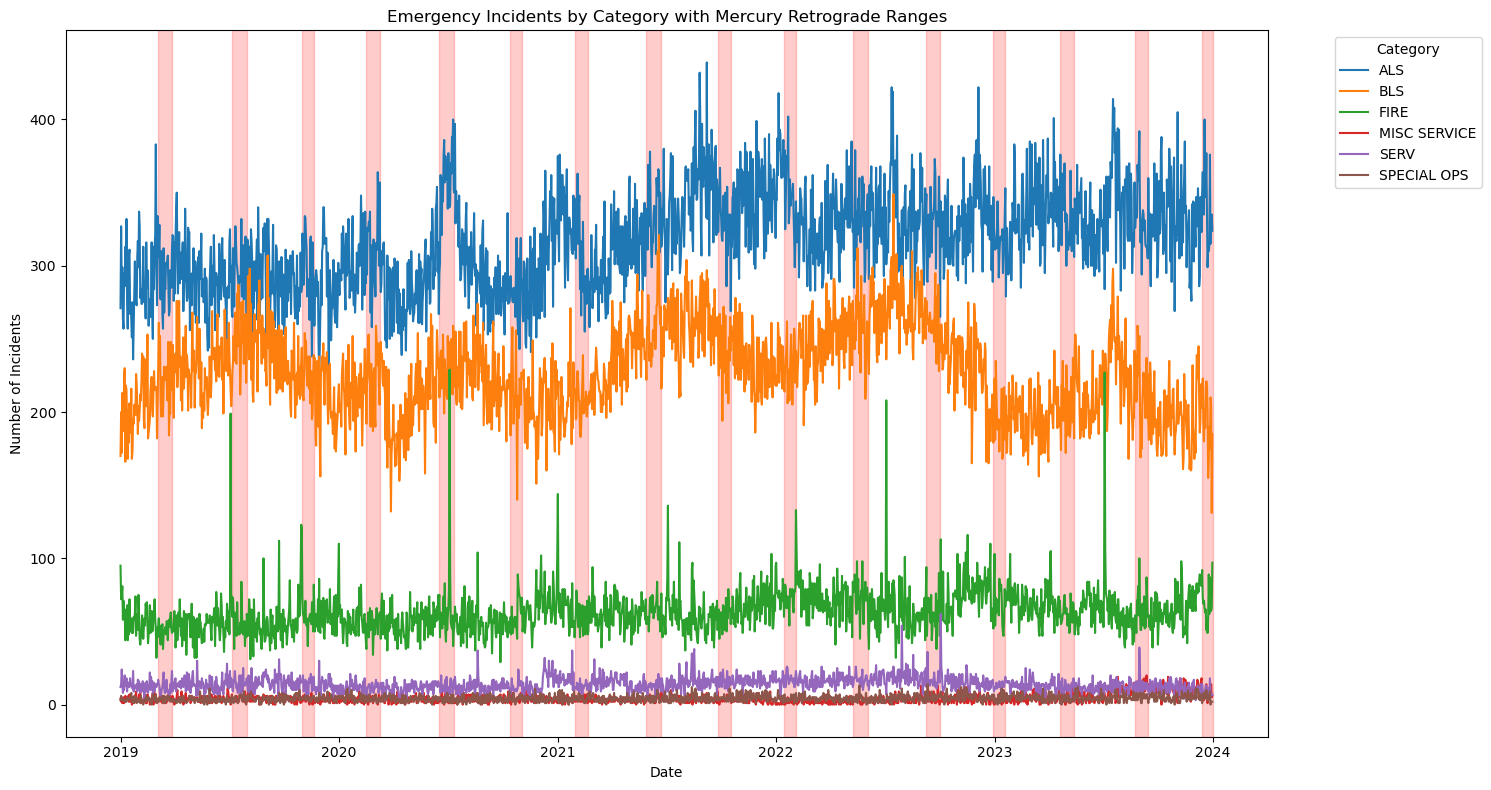

In [105]:
# Assuming emergency_df is your original dataframe
emergency_df['REPORTED'] = pd.to_datetime(emergency_df['REPORTED'])

# Group by date and category, then count incidents
grouped_data = emergency_df.groupby([emergency_df['REPORTED'].dt.date, 'CATEGORY']).size().unstack(fill_value=0)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the data
grouped_data.plot(ax=ax)

# Highlight the date ranges
for start, end in date_ranges:
    ax.axvspan(start, end, alpha=0.2, color='red')

plt.title('Emergency Incidents by Category with Mercury Retrograde Ranges')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Drill Down Analysis
### 2023

C:\Users\Erin\AppData\Local\Temp\ipykernel_39372\170871057.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emergency_df_2023['in_range'] = emergency_df_2023['REPORTED_DATE'].apply(lambda x: is_in_range(x, date_ranges))


Average COUNT within date ranges: 624.6470588235294
Average COUNT outside date ranges: 630.15

Monthly averages:
month
2023-01    605.258065
2023-02    619.142857
2023-03    626.387097
2023-04    636.166667
2023-05    623.806452
2023-06    614.333333
2023-07    689.806452
2023-08    648.903226
2023-09    618.533333
2023-10    616.225806
2023-11    614.433333
2023-12    631.451613
Freq: M, Name: COUNT, dtype: float64


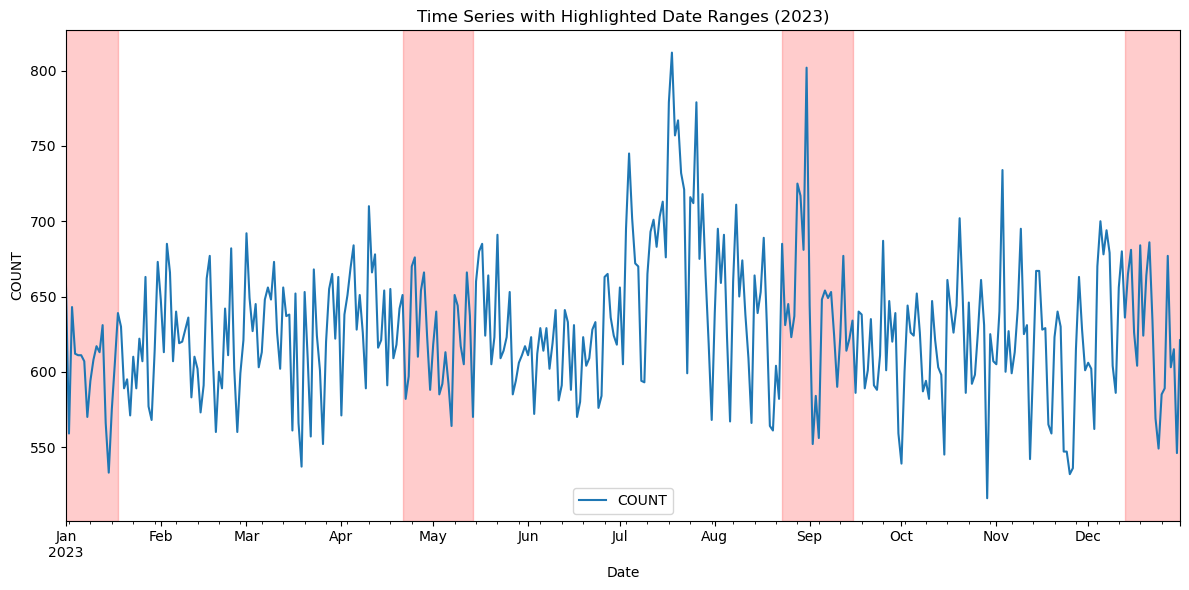

In [106]:
# Ensure REPORTED and REPORTED_DATE are datetime
emergency_df['REPORTED'] = pd.to_datetime(emergency_df['REPORTED'])
emergency_df['REPORTED_DATE'] = pd.to_datetime(emergency_df['REPORTED'].dt.date)

# Filter for 2023
emergency_df_2023 = emergency_df[emergency_df['REPORTED'].dt.year == 2023]

# Ensure date_ranges are Timestamps
date_ranges = [(pd.Timestamp(start), pd.Timestamp(end)) for start, end in date_ranges]

# Apply the function
emergency_df_2023['in_range'] = emergency_df_2023['REPORTED_DATE'].apply(lambda x: is_in_range(x, date_ranges))

# Group by date and calculate COUNT
emergency_df_2023_grouped = emergency_df_2023.groupby('REPORTED_DATE').size().reset_index(name='COUNT')
emergency_df_2023_grouped['in_range'] = emergency_df_2023_grouped['REPORTED_DATE'].apply(lambda x: is_in_range(x, date_ranges))

# Calculate averages
avg_in_range = emergency_df_2023_grouped[emergency_df_2023_grouped['in_range']]['COUNT'].mean()
avg_out_range = emergency_df_2023_grouped[~emergency_df_2023_grouped['in_range']]['COUNT'].mean()

print(f"Average COUNT within date ranges: {avg_in_range}")
print(f"Average COUNT outside date ranges: {avg_out_range}")

# Monthly averages
emergency_df_2023_grouped['month'] = emergency_df_2023_grouped['REPORTED_DATE'].dt.to_period('M')
monthly_avg = emergency_df_2023_grouped.groupby('month')['COUNT'].mean()

print("\nMonthly averages:")
print(monthly_avg)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

emergency_df_2023_grouped.plot(x='REPORTED_DATE', y='COUNT', ax=ax, label='COUNT')

for start, end in date_ranges:
    ax.axvspan(start, end, alpha=0.2, color='red')

plt.title('Time Series with Highlighted Date Ranges (2023)')
plt.xlabel('Date')
plt.ylabel('COUNT')
plt.legend()
plt.tight_layout()
plt.show()


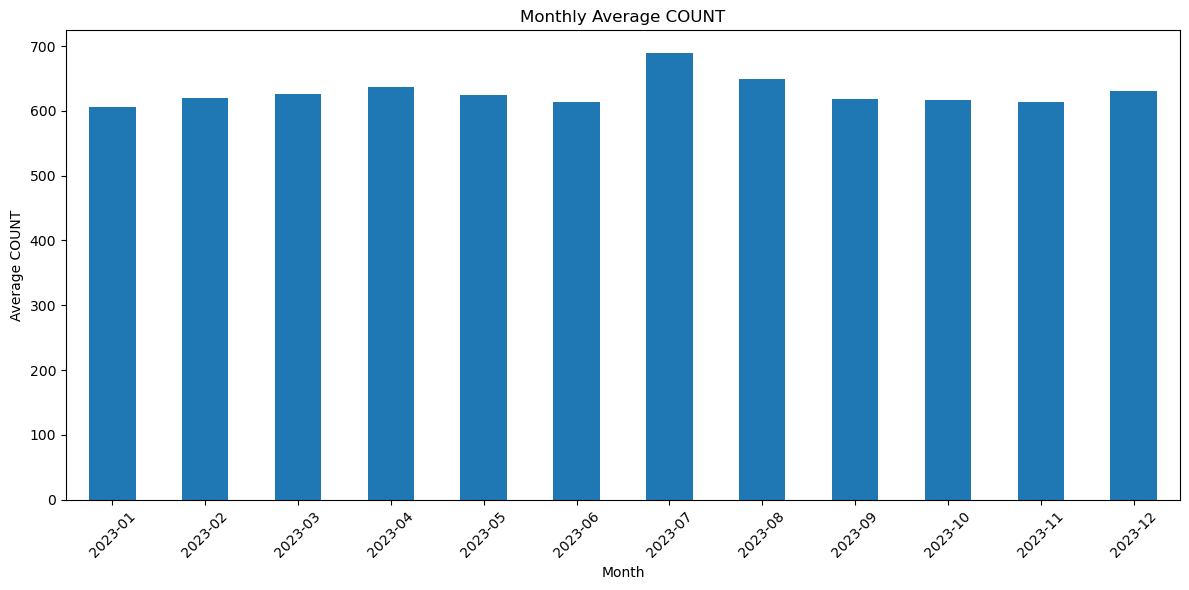

In [107]:
# Plot monthly averages
monthly_avg.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Average COUNT')
plt.xlabel('Month')
plt.ylabel('Average COUNT')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


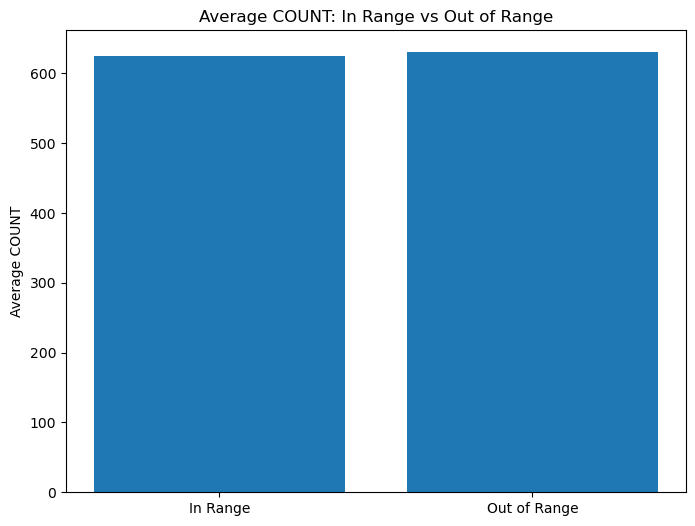

In [108]:
labels = ['In Range', 'Out of Range']
averages = [avg_in_range, avg_out_range]

plt.figure(figsize=(8, 6))
plt.bar(labels, averages)
plt.title('Average COUNT: In Range vs Out of Range')
plt.ylabel('Average COUNT')
plt.show()

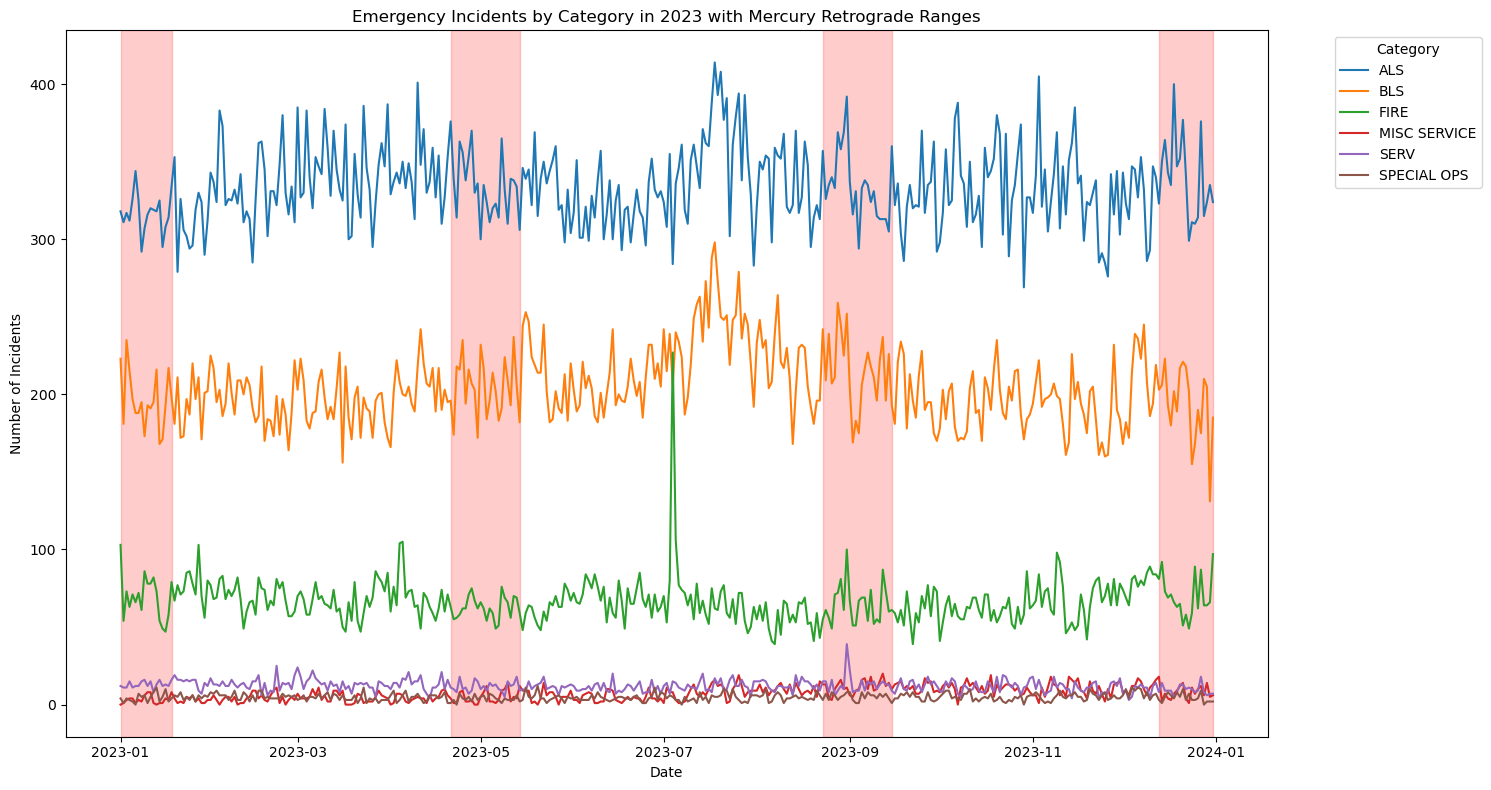

In [109]:
# Assuming emergency_df is your original dataframe
emergency_df['REPORTED'] = pd.to_datetime(emergency_df['REPORTED'])
emergency_df_2023 = emergency_df[emergency_df['REPORTED'].dt.year == 2023]

# Group by date and category, then count incidents
grouped_data = emergency_df_2023.groupby([emergency_df_2023['REPORTED'].dt.date, 'CATEGORY']).size().unstack(fill_value=0)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the data
grouped_data.plot(ax=ax)

# Highlight the date ranges
for start, end in date_ranges:
    start = pd.Timestamp(start)
    end = pd.Timestamp(end)
    if start.year == 2023 or end.year == 2023:  # Only highlight ranges that overlap with 2023
        ax.axvspan(max(start, pd.Timestamp('2023-01-01')), 
                   min(end, pd.Timestamp('2023-12-31')), 
                   alpha=0.2, color='red')

plt.title('Emergency Incidents by Category in 2023 with Mercury Retrograde Ranges')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()